In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
import sklearn.metrics as sm
from sklearn.cluster import DBSCAN
from pylab import rcParams
from collections import Counter


In [5]:

%matplotlib inline
rcParams['figure.figsize'] = 5 , 4
sb.set_style('whitegrid')


In [6]:
address = r'C:\Users\Dell\Python For Data Science\Data\iris.data.csv'

df = pd.read_csv(address )
 
df.head()

,5.1,3.5,1.4,0.2,setosa
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [9]:
data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

In [11]:
df[:7]

,5.1,3.5,1.4,0.2,setosa
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
5,4.6,3.4,1.4,0.3,setosa
6,5.0,3.4,1.5,0.2,setosa


In [14]:
model = DBSCAN(eps = 0.8 , min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


Outliers Detection - outlier should not be more than 5% of the data

In [18]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

Counter({1: 94, 0: 49, -1: 6})


### Label -1 datapoints are considered outliers

In [16]:


print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 49, -1: 6})
       0    1    2    3
97   5.1  2.5  3.0  1.1
104  7.6  3.0  6.6  2.1
116  7.7  3.8  6.7  2.2
117  7.7  2.6  6.9  2.3
121  7.7  2.8  6.7  2.0
130  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

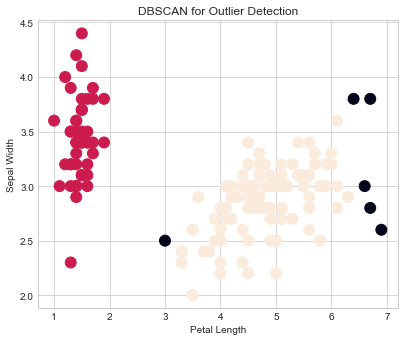

In [17]:
fig = plt.figure()
ax = fig.add_axes([.1 , .1 , 1 , 1])

colors = model.labels_

ax.scatter(data[:,2] , data[:,1] , c = colors, s = 120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')
